[原文链接](https://www.music21.org/music21docs/usersGuide/usersGuide_01_installing.html)

In [1]:
from music21 import *

In [2]:
ks2 = key.KeySignature(2)
ks2.sharps

2

In [3]:
ks7 = key.KeySignature(7)
ks7

<music21.key.KeySignature of 7 sharps>

In [4]:
ks2.alteredPitches

[<music21.pitch.Pitch F#>, <music21.pitch.Pitch C#>]

In [5]:
ks2.accidentalByStep('C')

<music21.pitch.Accidental sharp>

In [6]:
ks2.accidentalByStep('E') is None

True

In [7]:
ks2.accidentalByStep('C#')

In [8]:
ks12 = key.KeySignature(12)
ks12.accidentalByStep('F')

<music21.pitch.Accidental double-sharp>

In [9]:
ks4 = ks2.transpose('M2')
ks4

<music21.key.KeySignature of 4 sharps>

In [10]:
ks4.sharps = 0
ks4

<music21.key.KeySignature of no sharps or flats>

In [11]:
ks2.getScale('major')

<music21.scale.MajorScale D major>

In [12]:
ks2.getScale('minor')

<music21.scale.MinorScale B minor>

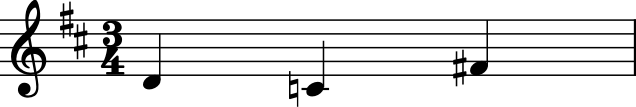

In [13]:
m = stream.Measure()
m.insert(0, meter.TimeSignature('3/4'))
m.insert(0, ks2)
d = note.Note('D')
c = note.Note('C')
fis = note.Note('F#') # German name
m.append([d, c, fis])
m.show()

In [14]:
fis.pitch.accidental.displayStatus

In [15]:
m.makeAccidentals(inPlace=True)
fis.pitch.accidental.displayStatus

False

In [16]:
c.pitch.accidental, c.pitch.accidental.displayStatus

(<music21.pitch.Accidental natural>, True)

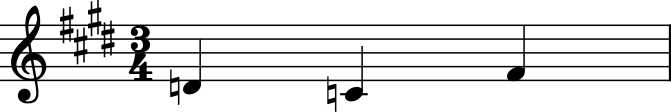

In [17]:
m.keySignature = key.KeySignature(4)
m.show()

In [18]:
eroicaFlats = 3
ksEroica = key.KeySignature(-1 * eroicaFlats)
ksEroica

<music21.key.KeySignature of 3 flats>

In [19]:
ksEroica.sharps

-3

In [20]:
ksEroica.flats

AttributeError: 'KeySignature' object has no attribute 'flats'

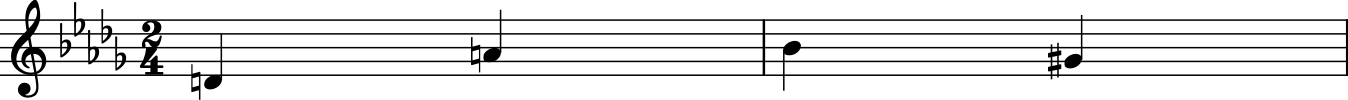

In [21]:
m1 = stream.Measure()
m1.timeSignature = meter.TimeSignature('2/4')
m1.keySignature = key.KeySignature(-5)
m1.append([note.Note('D'), note.Note('A')])
m2 = stream.Measure()
m2.append([note.Note('B-'), note.Note('G#')])
p = stream.Part()
p.append([m1, m2])
p.show()

In [22]:
m1.notes[0].pitch.accidental = pitch.Accidental('flat')

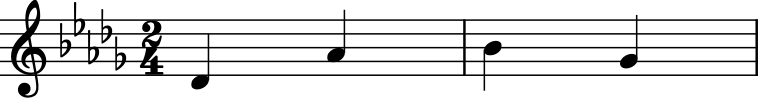

In [23]:
ks = m1.keySignature
for n in p.recurse().notes:  # we need to recurse because the notes are in measures...
    nStep = n.pitch.step
    rightAccidental = ks.accidentalByStep(nStep)
    n.pitch.accidental = rightAccidental
p.show()

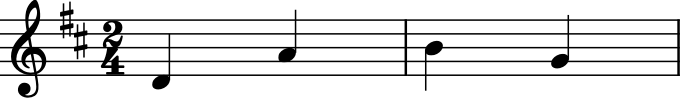

In [24]:
p.transpose(1).show()

In [25]:
kD = key.Key('D')
kD

<music21.key.Key of D major>

In [26]:
bFlat = pitch.Pitch('B-')
kBflat = key.Key(bFlat)
kBflat

<music21.key.Key of B- major>

In [27]:
kd = key.Key('D', 'minor')
kd

<music21.key.Key of d minor>

In [28]:
kg = key.Key('g')
kg

<music21.key.Key of g minor>

In [29]:
(ksEroica.asKey('major'), ksEroica.asKey('minor'))

(<music21.key.Key of E- major>, <music21.key.Key of c minor>)

In [30]:
amixy = key.Key('a', 'mixolydian')
amixy

<music21.key.Key of A mixolydian>

In [31]:
amixy.sharps

2

In [32]:
amixy.alteredPitches

[<music21.pitch.Pitch F#>, <music21.pitch.Pitch C#>]

In [33]:
amixy.transpose('M3')

<music21.key.Key of C# mixolydian>

In [34]:
aDarkKey = key.Key('B--', 'locrian')
aDarkKey.alteredPitches

[<music21.pitch.Pitch B->,
 <music21.pitch.Pitch E->,
 <music21.pitch.Pitch A->,
 <music21.pitch.Pitch D->,
 <music21.pitch.Pitch G->,
 <music21.pitch.Pitch C->,
 <music21.pitch.Pitch F->,
 <music21.pitch.Pitch B-->,
 <music21.pitch.Pitch E-->,
 <music21.pitch.Pitch A-->,
 <music21.pitch.Pitch D-->,
 <music21.pitch.Pitch G-->,
 <music21.pitch.Pitch C-->,
 <music21.pitch.Pitch F-->]

In [35]:
kg.mode, amixy.mode

('minor', 'mixolydian')

In [36]:
kg.tonic, amixy.tonic

(<music21.pitch.Pitch G>, <music21.pitch.Pitch A>)

In [37]:
kg.relative

<music21.key.Key of B- major>

In [38]:
kg.parallel

<music21.key.Key of G major>

In [39]:
kg.relative.relative == kg

True

In [40]:
kg.tonicPitchNameWithCase

'g'

In [41]:
kg.parallel.tonicPitchNameWithCase

'G'

In [42]:
bach = corpus.parse('bwv66.6')
bach.id = 'bach66'
bach.analyze('key')

<music21.key.Key of f# minor>

In [43]:
fis = bach.analyze('key')
fis.correlationCoefficient

0.9379555412471554

In [44]:
fis.tonalCertainty()

1.2642604260880534

In [45]:
fis.alternateInterpretations[0:4]

[<music21.key.Key of A major>,
 <music21.key.Key of b minor>,
 <music21.key.Key of E major>,
 <music21.key.Key of c# minor>]

In [46]:
fis.alternateInterpretations[-3:]

[<music21.key.Key of B- major>,
 <music21.key.Key of E- major>,
 <music21.key.Key of c minor>]

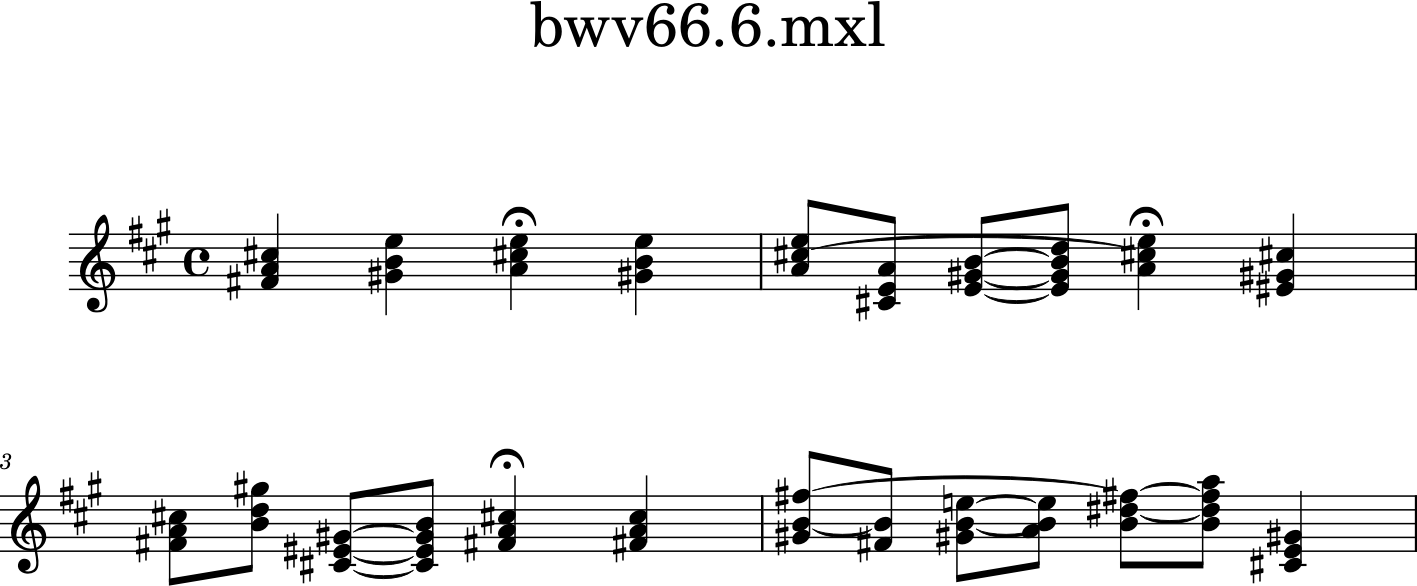

In [47]:
c = bach.measures(1, 4).chordify()
for ch in c.recurse().getElementsByClass('Chord'):
    ch.closedPosition(inPlace=True, forceOctave=4)
c.show()

In [48]:
bach.analyze('key.krumhanslschmuckler')

<music21.key.Key of f# minor>

In [49]:
fisNew = bach.analyze('key.krumhanslschmuckler')
fisCC = round(fis.correlationCoefficient, 3)
fisNewCC = round(fisNew.correlationCoefficient, 3)
(fisCC, fisNewCC)

(0.938, 0.815)

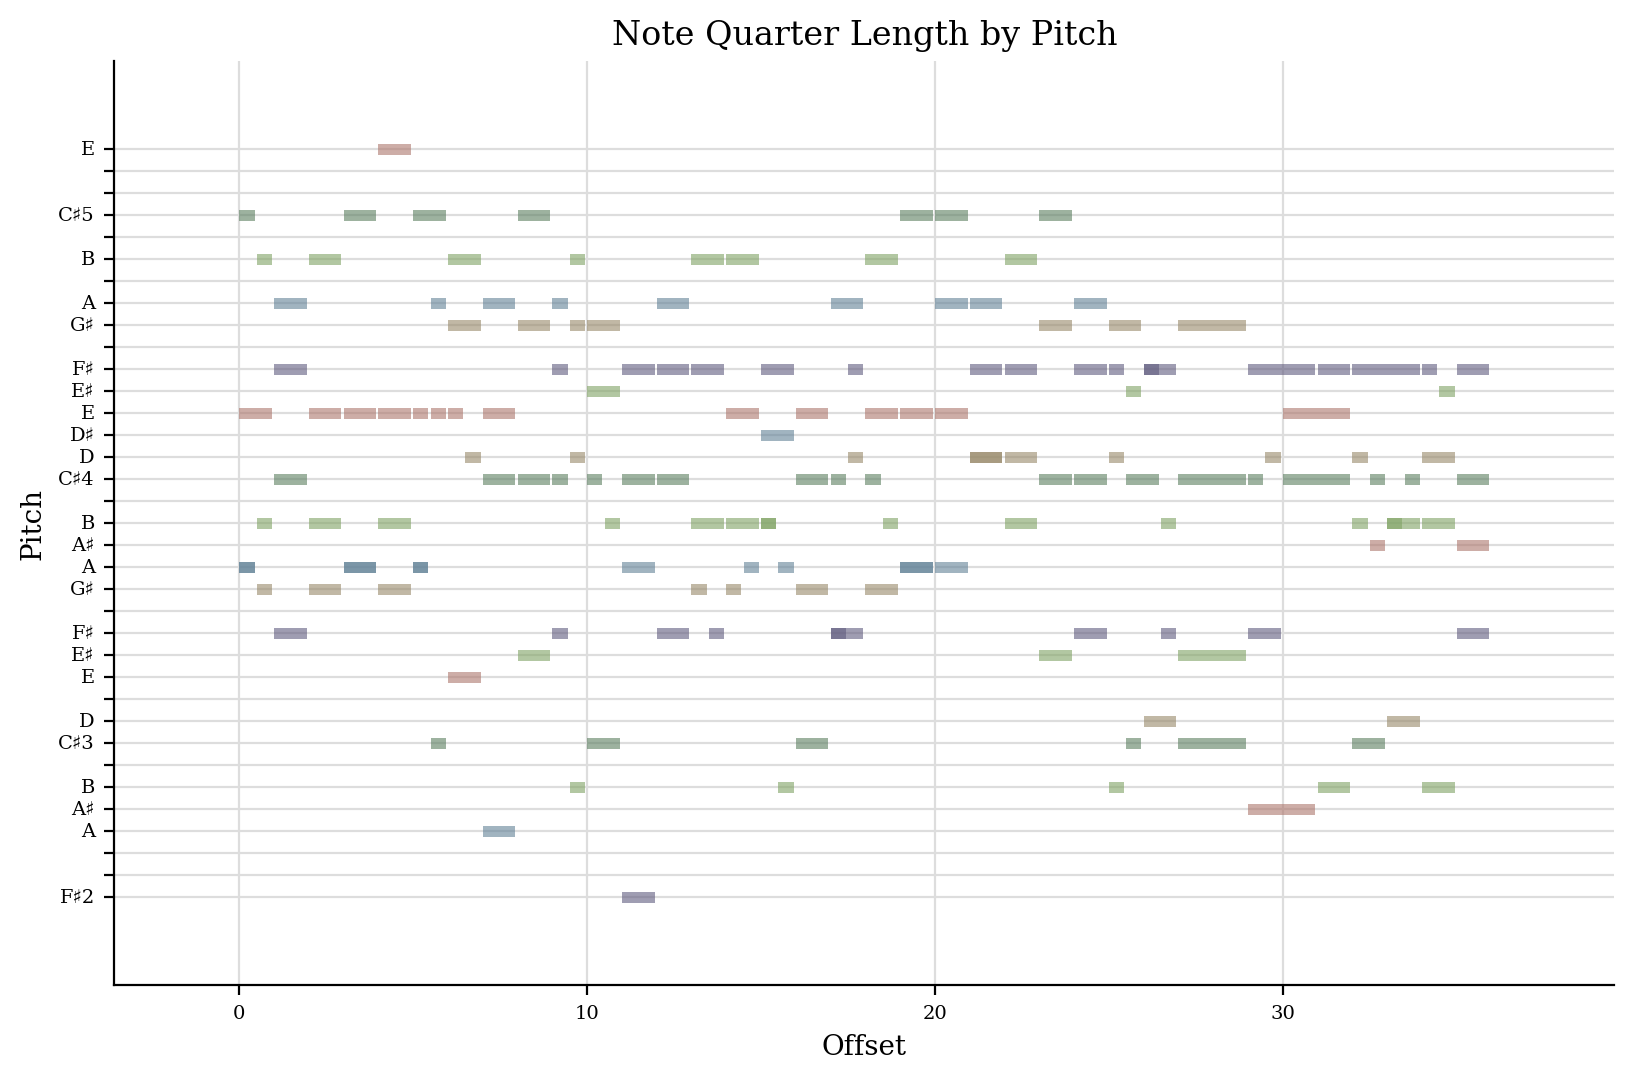

In [50]:
bach.flatten().plot('pianoroll')

In [51]:
k = key.Key('E-')
k.classes

('Key',
 'KeySignature',
 'DiatonicScale',
 'ConcreteScale',
 'Scale',
 'Music21Object',
 'ProtoM21Object',
 'object')

In [52]:
k.pitchFromDegree(2)

<music21.pitch.Pitch F4>

In [53]:
k.solfeg('G')

'mi'

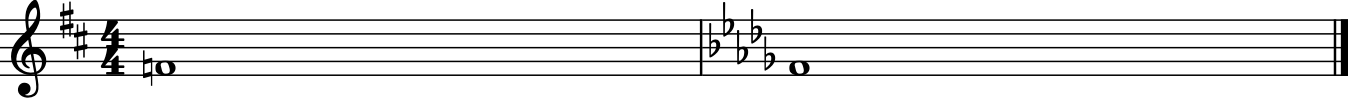

In [54]:
s = stream.Stream()
s.append(key.Key('D'))
s.append(note.Note('F', type='whole'))
s.append(key.Key('b-', 'minor'))
s.append(note.Note('F', type='whole'))
s2 = s.makeNotation()
s2.show()

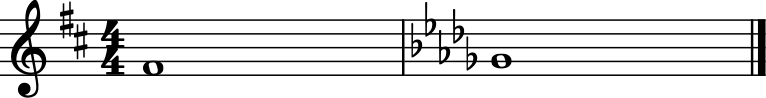

In [55]:
for n in s2.recurse().notes:
    n.transpose(1, inPlace=True)
s2.show()

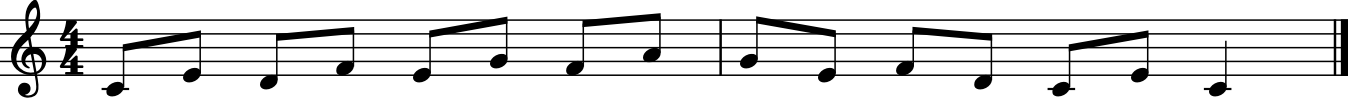

In [56]:
pitchStream = stream.Part()
pitchStream.insert(0, meter.TimeSignature('4/4'))
for step in ('c', 'e', 'd', 'f', 'e', 'g', 'f', 'a',
             'g', 'e', 'f', 'd', 'c', 'e', 'c'):
    n = note.Note(step, type='eighth')
    n.pitch.octave = 4
    pitchStream.append(n)
pitchStream.notes[-1].duration.type = 'quarter'
pitchStream.makeMeasures(inPlace=True)
pitchStream.show()

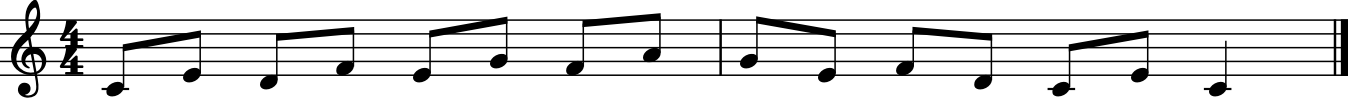

In [57]:
k = key.Key('C')
pitchStream.measure(1).insert(0, k)
pitchStream.show()

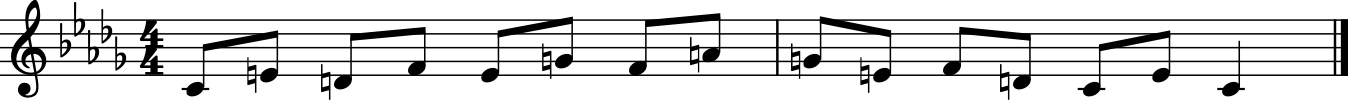

In [58]:
k.transpose(1, inPlace=True)
pitchStream.show()

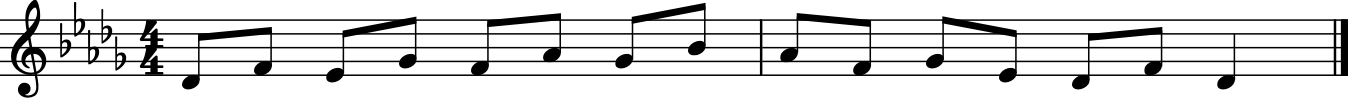

In [59]:
for n in pitchStream.recurse().notes:
    n.transpose(1, inPlace=True)

pitchStream.show()

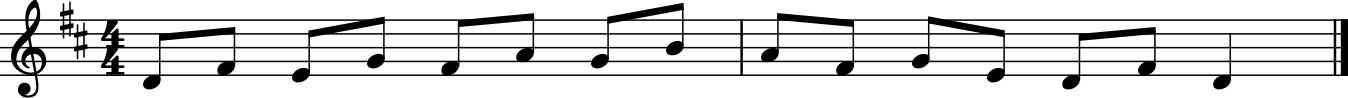

In [60]:
k.transpose(1, inPlace=True)
for n in pitchStream.recurse().notes:
    n.transpose(1, inPlace=True)
pitchStream.show()

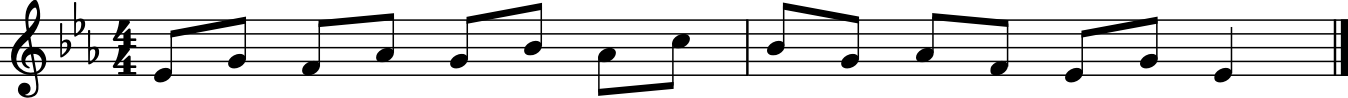

In [61]:
k.transpose(1, inPlace=True)
for n in pitchStream.recurse().notes:
    n.transpose(1, inPlace=True)
pitchStream.show()

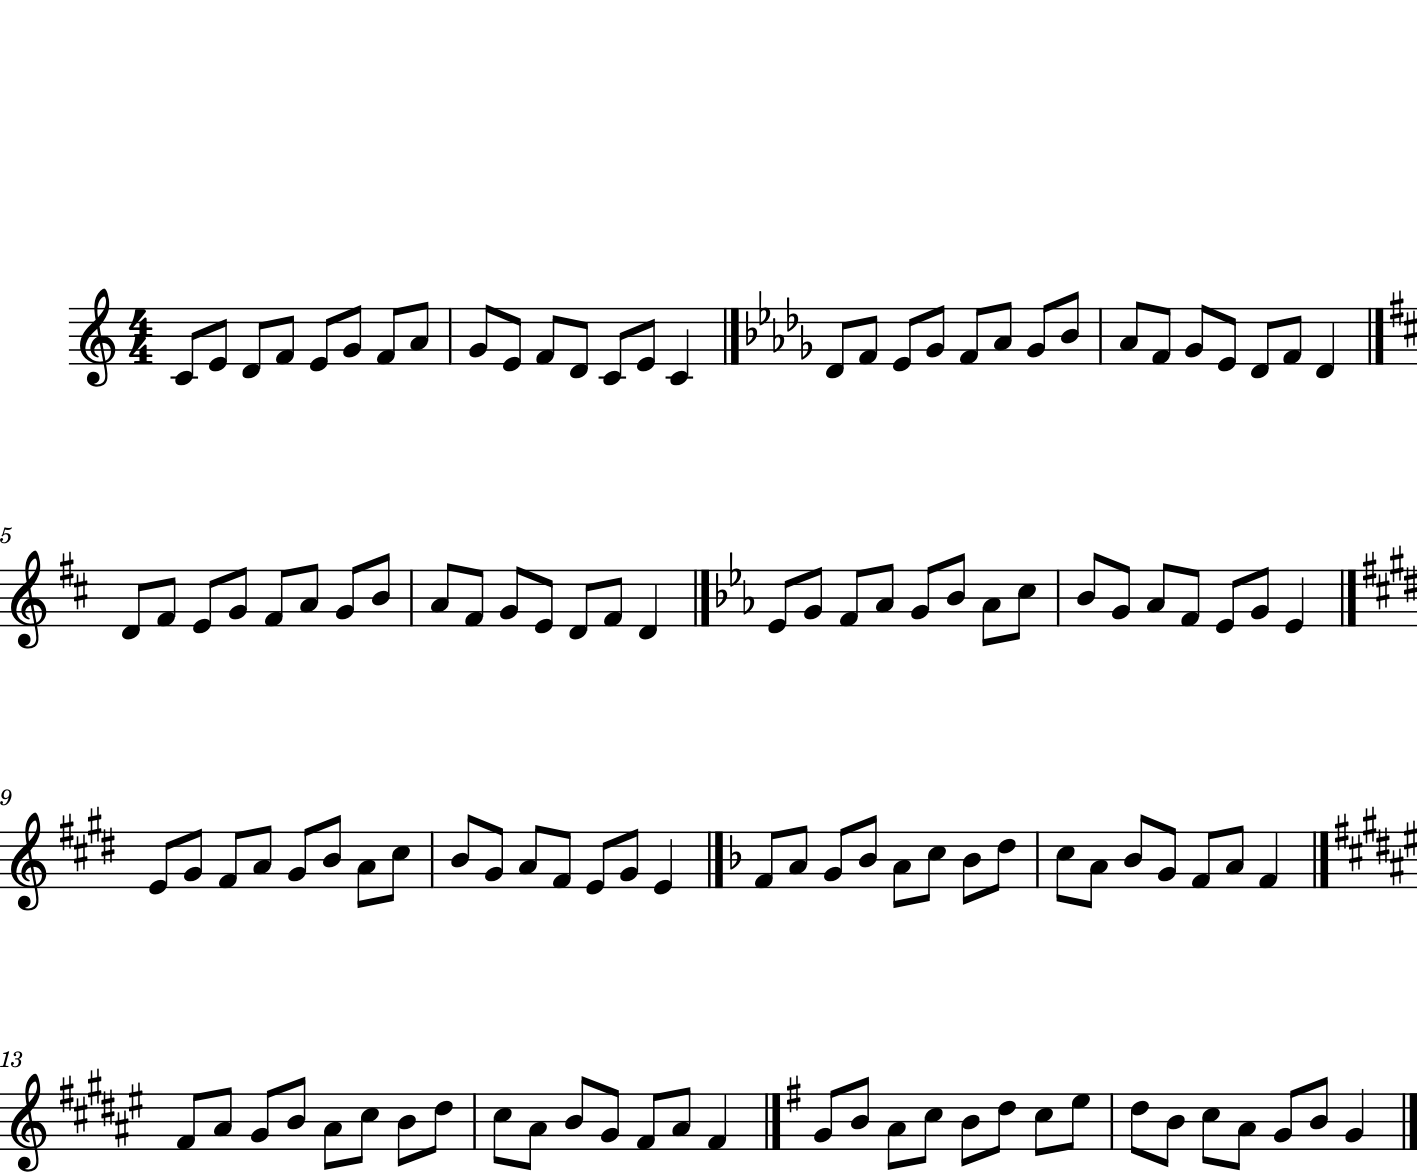

In [62]:
out = stream.Part()
for i in range(0, 8):
    pitchStream = converter.parse("tinyNotation: 4/4 c8 e d f e g f a g e f d c e c4")

    if i != 0:
        # remove redundant clefs and time signature
        trebleClef = pitchStream.recurse().getElementsByClass('Clef')[0]
        fourFour = pitchStream.recurse().getElementsByClass('TimeSignature')[0]

        pitchStream.remove(trebleClef, recurse=True)
        pitchStream.remove(fourFour, recurse=True)

    if i % 2 == 0:
        # add a line break at the beginning of every other line:
        pitchStream.measure(1).insert(0, layout.SystemLayout(isNew=True))

    k = key.Key('C')
    pitchStream.measure(1).insert(0, k)
    k.transpose(i, inPlace=True)
    for n in pitchStream.recurse().notes:
        n.transpose(i, inPlace=True)
    for el in pitchStream:
        out.append(el)

out.show()

In [63]:
out.show('midi')